# 0. Carga del Dataset y Otro Código

## 0.1 Importar Librerías y Funciones

In [1]:
# Importar librerías

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importar funciones varias

from Source import *

In [3]:
# Definiendo variables y constantes

Color_Palette = ['green','red','gold']
Color_Map = 'seismic'

Macronutrients = ['Carbs','Protein','Fat']
Diets = ['dash', 'keto', 'mediterranean', 'paleo', 'vegan']
Cuisine = 'Cuisine_type'
Diet = 'Diet_type'
Total = 'Total_macronutrients'
Recipe = 'Recipe_name'

MapTranslate = {
    'Carbs' : 'Carbohidratos',
    'Protein' : 'Proteínas',
    'Fat' : 'Grasas',
}
InverseMacronutrient = {
    'Carbs' : 0,
    'Protein' : 1,
    'Fat' : 2,
}

RANDOM_STATE = 8013

## 0.2 Carga de Datos

In [4]:
# Carga de datos

macronutrients = ['Carbs(g)','Protein(g)','Fat(g)']

Diets_Dataset = pd.read_csv('../Datasets/Diets_Dataset.csv')
Diets_Dataset.drop(columns=['Extraction_day','Extraction_time'],inplace=True)
Diets_Dataset.rename(columns={macronutrient : macronutrient[:-3] for macronutrient in macronutrients},inplace=True)

# 3. Presentación de los Datos

In [5]:
# Ejemplos de registros del conjunto de datos

Diets_Dataset

,Diet_type,Recipe_name,Cuisine_type,Protein,Carbs,Fat
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55
...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84


In [6]:
# Valore únicos por variable en el conjunto de datos

Diets_Dataset.apply(lambda column: column.unique().shape[0],axis=0)

Diet_type          5
Recipe_name     7062
Cuisine_type      19
Protein         6060
Carbs           6618
Fat             6322
dtype: int64

# 4. Estadística Descriptiva

## 4.1 Preprocesamiento (Transformación) de los Datos

In [7]:
# Normalización de los Macronutrientes

Diets_Dataset[Total] = Diets_Dataset[Macronutrients].sum(axis=1)
Diets_Dataset[Macronutrients] /= Diets_Dataset[Total].to_numpy()[:,None]

In [8]:
# Recetas por Dieta y Cocina

Diets_Dataset.pivot_table(Recipe,Cuisine,Diet,'count',margins=True,margins_name='Total').sort_values('Total')

Diet_type,dash,keto,mediterranean,paleo,vegan,Total
Cuisine_type,,,,,,
kosher,5.0,NaN,NaN,2.0,NaN,7
caribbean,3.0,7.0,1.0,6.0,1.0,18
central europe,9.0,11.0,1.0,9.0,4.0,34
japanese,9.0,10.0,2.0,5.0,24.0,50
eastern europe,10.0,11.0,3.0,27.0,4.0,55
middle eastern,21.0,17.0,26.0,12.0,15.0,91
indian,20.0,12.0,3.0,9.0,48.0,92
chinese,38.0,38.0,1.0,26.0,17.0,120
asian,24.0,11.0,12.0,12.0,67.0,126


In [9]:
# Agrupación de Tipos de Cocina por Regiones Geográficas

GroupsCuisine = {
    'american' : 0,
    'mediterranean' : 1,
    'world' : 2,
    'mexican' : 3,
    'south american' : 3,
    'caribbean' : 3,
    'italian' : 4, 
    'french' : 4,
    'nordic' : 4,
    'eastern europe' : 4,
    'central europe' : 4,
    'kosher' : 4,
    'british' : 4,
    'chinese' : 5,
    'indian' : 5,
    'south east asian' : 5,
    'middle eastern' : 5,
    'asian' : 5,
    'japanese' : 5,
}

groups_names = {
    0 : 'american',
    1 : 'mediterranean',
    2 : 'world',
    3 : 'latin american and caribbean',
    4 : 'european',
    5 : 'asian'
}

Diets_Dataset[Cuisine] = Diets_Dataset[Cuisine].apply(GroupsCuisine.get).apply(groups_names.get)

## 4.3 Visión General de los Datos

In [10]:
# Calculo de las medidas de tendencia central, dispersión y asimetría 

SummaryMeasures(Diets_Dataset)

,Carbs,Protein,Fat
mean,0.433471,0.234762,0.331767
25%,0.205251,0.110188,0.184583
50%,0.432028,0.190931,0.314359
75%,0.635058,0.338059,0.464532
std,0.256032,0.163886,0.194920
min,0.000330,0.000000,0.000000
max,1.000000,0.887557,0.997940
skewness,0.189556,0.922401,0.461455


FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: './Resources/EDA/'

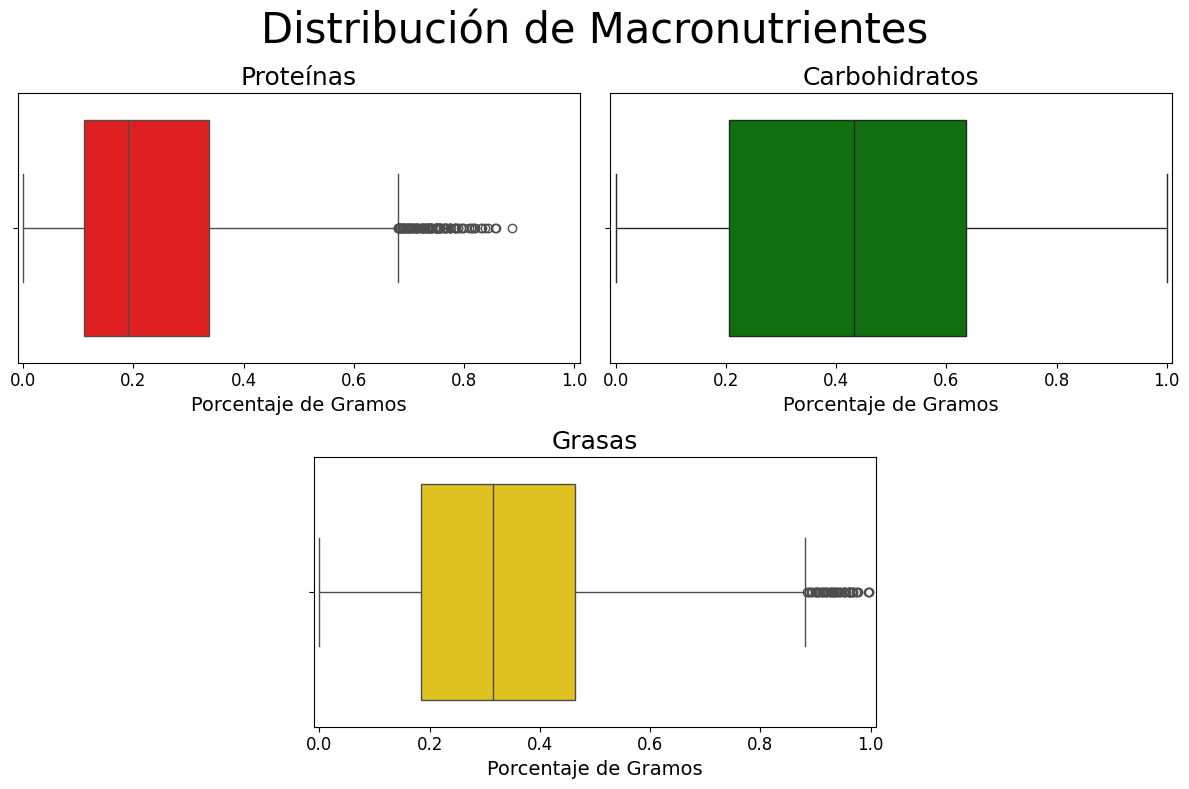

In [11]:
fig_plot = Plot_DistributionMacronutrients(Diets_Dataset)
SaveFig(fig_plot,'EDA','VisionGeneral_1')

# 5. Análisis Bivariado

# 6. Muestreo e Intervalos de Confianza

# 7. Pruebas de Hipótesis